In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

## Data preparation

In [7]:
# Read the train from the CSV file

train = pd.read_csv('data/train.csv', index_col=0)
test = pd.read_csv('data/test.csv', index_col=0)

In [9]:
train

,art_id,keyword,country_code,text,label,par_id,category_label
794,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,1,"[0, 0, 0, 0, 0, 0, 0]"
795,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,2,"[0, 0, 0, 0, 0, 0, 0]"
796,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0,3,"[0, 0, 0, 0, 0, 0, 0]"
797,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,4,"[0, 0, 0, 0, 0, 0, 0]"
798,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0,5,"[0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...
41,@@4665292,women,jm,""" I do n't believe in abortion , I think it is...",1,10424,"[1, 0, 0, 1, 0, 0, 0]"
728,@@3923193,refugee,gb,More than 150 volunteers spent the night in ' ...,1,10445,"[0, 1, 0, 0, 0, 0, 0]"
609,@@22338535,vulnerable,ie,""" We are challenged , I suggest , to turn this...",1,10454,"[1, 1, 0, 0, 1, 1, 0]"
26,@@20282330,in-need,ng,""" She has one huge platform , and information ...",1,10467,"[1, 0, 0, 0, 0, 0, 0]"


## Data Analysis

#### InputLength-Label

In [10]:
# Count the number of words in the text feature
length = train['text'].fillna('').astype(str).apply(lambda x: len(x.split()))

In [11]:
# Merge with labels from the original trainset using id

length_corr = pd.merge(length, train['label'], left_index=True, right_index=True)
length_corr

,text,label
794,123,0
795,41,0
796,27,0
797,30,0
798,53,0
...,...,...
41,31,1
728,21,1
609,48,1
26,58,1


In [12]:
# Calculate the correlation of count of words with the label

length_corr.corr()

,text,label
text,1.000000,0.052849
label,0.052849,1.000000


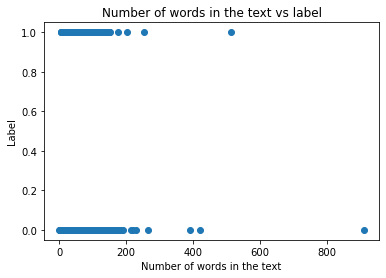

In [13]:
# Plot the scatter plot of length_corr of the text feature and the label

import matplotlib.pyplot as plt

plt.scatter(length_corr['text'], length_corr['label'])
plt.xlabel('Number of words in the text')
plt.ylabel('Label')
plt.title('Number of words in the text vs label')
plt.show()



NOT CORRELATED

#### UniqueWords

In [14]:
# Count the number of unique words in the text feature

unique = train['text'].fillna('').astype(str).apply(lambda x: len(set(x.split())))
unique_corr = pd.merge(unique, train['label'], left_index=True, right_index=True)

In [15]:
unique_corr.corr() # Calculate the correlation of count of unique words with the label

,text,label
text,1.000000,0.048435
label,0.048435,1.000000


#### Keyword-Label

In [16]:
keywords = train.groupby(['keyword', 'label']).size().reset_index(name='count')

In [17]:
keywords

,keyword,label,count
0,disabled,0,767
1,disabled,1,67
2,homeless,0,716
3,homeless,1,149
4,hopeless,0,690
5,hopeless,1,98
6,immigrant,0,820
7,immigrant,1,23
8,in-need,0,713
9,in-need,1,143


In [18]:
# Compute the correlation for every pair in the keyword

keywords_corr = keywords.pivot(index='keyword', columns='label', values='count').fillna(0)
keywords_corr['correlation'] = keywords_corr[1] / (keywords_corr[0] + keywords_corr[1])
keywords_corr


label,0,1,correlation
keyword,,,
disabled,767,67,0.080336
homeless,716,149,0.172254
hopeless,690,98,0.124365
immigrant,820,23,0.027284
in-need,713,143,0.167056
migrant,851,31,0.035147
poor-families,607,112,0.155772
refugee,807,73,0.082955
vulnerable,811,60,0.068886


NOT CORRELATED

#### Number of upper cases

In [ ]:
# Compute the number of upper cases in the text feature

upper = train['text'].fillna('').astype(str).apply(lambda x: sum(1 for c in x if c.isupper()))
upper

par_id
1         4
2         7
3         4
4         4
5         9
         ..
10465     4
10466     7
10467     3
10468    15
10469     9
Name: text, Length: 10469, dtype: int64

In [ ]:
joined = pd.merge(upper, train['label'], left_index=True, right_index=True)

In [ ]:
joined.corr()

,text,label
text,1.00000,-0.00663
label,-0.00663,1.00000


NOT CORRELATED

#### Specific words

In [ ]:
words = ['us', 'they', 'must', 'help']

In [ ]:
found_words = train['text'].fillna('').astype(str).apply(lambda x: sum(1 for word in words if re.search(r'\b' + word + r'\b', x)))
found_words

par_id
1        1
2        0
3        0
4        0
5        0
        ..
10465    0
10466    0
10467    1
10468    0
10469    0
Name: text, Length: 10469, dtype: int64

In [ ]:
# Count how many 2 are in the series fund_words

found_words.value_counts()

0    8481
1    1793
2     187
3       8
Name: text, dtype: int64

In [ ]:
# For every value count, calculate the correlation with the label

found_words_corr = pd.merge(found_words, train['label'], left_index=True, right_index=True)
found_words_corr.corr()

,text,label
text,1.000000,0.115108
label,0.115108,1.000000


In [ ]:
# Compute the existance of words one by one in the text feature

words = ['us', 'they', 'must', 'help']

found_words = train['text'].fillna('').astype(str).apply(lambda x: [1 if re.search(r'\b' + word + r'\b', x) else 0 for word in words])

found_words = pd.trainFrame(found_words.tolist(), columns=words, index=train.index)
found_words

,us,they,must,help
par_id,,,,
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
...,...,...,...,...
10465,0,0,0,0
10466,0,0,0,0
10467,0,0,0,1


In [ ]:
joined = pd.merge(found_words, train['label'], left_index=True, right_index=True)

joined.corr()

,us,they,must,help,label
us,1.000000,0.022985,0.021699,0.030836,0.065728
they,0.022985,1.000000,0.047210,0.038377,0.047467
must,0.021699,0.047210,1.000000,-0.004149,0.029243
help,0.030836,0.038377,-0.004149,1.000000,0.109097
label,0.065728,0.047467,0.029243,0.109097,1.000000


NOT CORRELATED

#### Country code

In [10]:
# Calculate the correlation of each country in the column country code and the label

countries = train.groupby(['country_code', 'label']).size().reset_index(name='count')
countries_corr = countries.pivot(index='country_code', columns='label', values='count').fillna(0)
countries_corr['correlation'] = countries_corr[1] / (countries_corr[0] + countries_corr[1])
countries_corr



label,0,1,correlation
country_code,,,
au,411,32,0.072235
bd,372,37,0.090465
ca,374,38,0.092233
gb,365,48,0.116223
gh,376,63,0.143508
hk,377,20,0.050378
ie,383,42,0.098824
in,394,32,0.075117
jm,339,47,0.121762


## Qualitative Analysis

First, we have to take into account that the trainset has been annotated by 3 expert annotatorss, with backgrounds in communication, media and train science. Two annotators
annotated the whole trainset (ann1 and ann2), while the third one (ann3) acted as a referee to provide a final label in case of disagreements.

In [ ]:
train['text'][1]

"We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism ."

"We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism ."

In [ ]:
train['label'][1]

0

In [ ]:
label1 = train[train['label'] == 1]
label2 = train[train['label'] == 2]
label3 = train[train['label'] == 3]

In [ ]:
label1.iloc[0]['text']

'NUEVA ERA , Ilocos Norte - No family shall be homeless under the watch of the municipal government here , said town Mayor Aldrin Garvida .'

FOR

Paternalistic Tone:
The phrase "under the watch of the municipal government" can imply that the government (and by extension, the mayor) is assuming a parental role over the citizens. This language might be seen as suggesting that families are incapable of managing on their own without strict oversight.

Overpromising Assurance:
The declaration "No family shall be homeless" may be interpreted as an overly optimistic promise that oversimplifies the complex social issue of homelessness. This can come off as dismissive of the real challenges and systemic factors involved, potentially patronizing those who are affected.

Implied Superiority:
The wording can be viewed as positioning the mayor (and his administration) as the all-knowing protector, which might be perceived as a way to elevate their status above the citizens they serve. This tone can feel condescending to individuals who may see themselves as capable partners rather than passive recipients of charity or control.

AGAINST

Intent to Inspire Confidence:
The statement may be intended to reassure the public by expressing a strong commitment to social welfare. Rather than patronizing, the language could be seen as a bold promise meant to inspire trust and unity among citizens.

Contextual and Cultural Nuances:
In many local or cultural contexts, it is common for public officials to use strong, declarative language to communicate their dedication to solving social issues. The phrase "under the watch" might be a culturally accepted way of expressing oversight and care, not necessarily intended to demean or belittle the audience.

Policy-Driven Message:
The language might simply reflect a policy position—a firm stance on eliminating homelessness. In this view, the wording is less about condescension and more about signaling a commitment to action, which can be appreciated by those seeking decisive leadership.

Rhetorical Style:
Political speeches and public statements often use dramatic language to capture attention. While such language can be interpreted in multiple ways, it doesn't automatically equate to condescension; it might instead be an effort to communicate a sense of urgency and responsibility

In [ ]:
label2.iloc[0]['text']

'Arshad said that besides learning many new aspects of sports leadership he learnt how fast-developing nations were using sports as a tool of development and in this effort the disabled and the underprivileged were not left behind at any stage .'

Arshad said that besides learning many new aspects of sports leadership he learnt how fast-developing nations were using sports as a tool of development and in this effort the disabled and the underprivileged were not left behind at any stage .

FOR

Implied Deficit Perspective:
By emphasizing that “the disabled and the underprivileged were not left behind,” the sentence can be read as if these groups are inherently at risk of being excluded. This may inadvertently reinforce a view of them as perpetually in need of rescue or special care rather than as active, capable participants.

Paternalistic Tone:
The language may suggest that it is up to “fast-developing nations” or those implementing these strategies to “save” or uplift these groups. Such a framing can come off as condescending, as it places the speaker or the advanced nations in a superior, almost guardian-like role over those deemed less fortunate.

Othering Through Inclusion:
Highlighting that the disabled and underprivileged must be explicitly “included” might imply that they are an exception to the norm. This could be interpreted as marginalizing them by suggesting they are fundamentally different or lesser than the mainstream population.

AGAINST

Recognition of Inclusivity Efforts:
The sentence acknowledges that development efforts are intentionally inclusive. Recognizing that marginalized groups are part of these strategies can be seen as a positive, affirming gesture rather than a patronizing one.

Empowerment Through Inclusion:
Emphasizing that no one is “left behind” might be intended to empower and validate the contributions of all segments of society. It signals a commitment to ensuring equitable development, which is typically not meant to belittle anyone but rather to promote social justice.

Factual and Observational Tone:
The statement is a report of what Arshad learned about the practices in fast-developing nations. It comes off as an observational insight rather than an attempt to lecture or diminish any group, making it less likely to be intentionally patronizing.

Context of Broader Development Narratives:
In many discussions about social development, it is common to underscore the importance of including all demographics. The phrasing reflects a broader, well-accepted development narrative rather than a personal bias, suggesting that the language may be standard in policy discussions rather than a condescending remark.

In [ ]:
label3.iloc[0]['text']

'Fast food employee who fed disabled man becomes internet sensation'

FOR

Reduction of Identity:
The phrase "disabled man" reduces a person to a single aspect of his identity. This can be seen as emphasizing his disability in a way that reinforces stereotypes of vulnerability, rather than recognizing him as a full individual with diverse qualities.

Exoticizing Everyday Kindness:
By labeling the act as something that turned a "fast food employee" into an "internet sensation," the headline may imply that such compassionate actions are rare or extraordinary simply because they involve someone from a lower-status occupation and a person with a disability. This could be read as patronizing—suggesting that acts of kindness are only newsworthy when they involve marginalized identities.

Implicit Power Dynamics:
The structure of the headline might unintentionally highlight a power imbalance. It frames the act as an exceptional benevolence by someone "ordinary" towards a "disabled" individual, potentially evoking a paternalistic narrative where the disabled person is seen as perpetually in need of rescue or charity.

AGAINST

Factual Reporting of a Viral Moment:
The headline is a straightforward report on an event that went viral. It simply states the facts: a fast food employee performed a kind act, and this was widely recognized online. In this view, the headline does not add judgmental language but merely highlights a moment of human kindness.

Celebration of Kindness Across Social Strata:
The headline can be interpreted as celebrating a positive action that transcends social and economic boundaries. It acknowledges that good deeds can come from any individual—regardless of their job title—and that they have the power to create a positive impact, thereby promoting a message of inclusivity rather than condescension.

Contextual Economy of Headlines:
Headlines are often crafted to grab attention using concise descriptions. The terms used (like "disabled man") are factual identifiers in this context and not necessarily intended to diminish or objectify the person involved. The goal is to inform quickly rather than to impose a patronizing tone.